<a href="https://colab.research.google.com/github/AyanRoy02/Basic-AI-Codes-and-Project/blob/main/CSE422_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
import os

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from os import path
drive.mount('/content/gdrive')



Mounted at /content/gdrive


# DATA PREPROCESSING

In [ ]:
loanee_train = pd.read_csv('/content/gdrive/MyDrive/CSE422_PROJECT/train.csv')
loanee_train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
loanee_train.shape

(614, 13)

In [ ]:
loanee_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

INPUTER

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(loanee_train[['LoanAmount']])

loanee_train['LoanAmount'] = impute.transform(loanee_train[['LoanAmount']])

FILLna

In [ ]:
loanee_train['Credit_History']=loanee_train['Credit_History'].fillna(0)
loanee_train['Dependents']=loanee_train['Dependents'].fillna("0")

DELETING ROWS

In [ ]:
loanee_train = loanee_train[loanee_train['Married'].notnull()]

USING MODE

In [ ]:
loanee_train['Loan_Amount_Term']=loanee_train['Loan_Amount_Term'].fillna(loanee_train['Loan_Amount_Term'].mode()[0])
loanee_train['Self_Employed']=loanee_train['Self_Employed'].fillna(loanee_train['Self_Employed'].mode()[0])
loanee_train['Gender']=loanee_train['Gender'].fillna(loanee_train['Gender'].mode()[0])

In [ ]:
loanee_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loanee_train.shape

(611, 13)

ONE-HOT ENCODING

In [ ]:
loanee_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
# Transform the category_desc column
category_enc = pd.get_dummies(loanee_train['Property_Area'])

# Take a look at the encoded columns
category_enc.head()

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
loanee_train=loanee_train.join(category_enc)
loanee_train = loanee_train.drop(["Property_Area"], axis=1)

TAKING CARE OF OTHER CATEGORICAL DATA

In [ ]:
#'Gender','Married','Education','Self_Employed'
category_enc = pd.get_dummies(loanee_train['Gender'])
loanee_train=loanee_train.join(category_enc)
loanee_train = loanee_train.drop(["Gender","Male"], axis=1)

category_enc = pd.get_dummies(loanee_train['Married'])
loanee_train=loanee_train.join(category_enc)
loanee_train.rename(columns = {'Yes':'Married_Y', 'No':'Married_N'}, inplace = True)
loanee_train = loanee_train.drop(["Married","Married_N"], axis=1)

category_enc = pd.get_dummies(loanee_train['Education'])
loanee_train=loanee_train.join(category_enc)
loanee_train = loanee_train.drop(["Education","Not Graduate"], axis=1)

category_enc = pd.get_dummies(loanee_train['Self_Employed'])
loanee_train=loanee_train.join(category_enc)
loanee_train.rename(columns = {'Yes':'Self_employed_Y', 'No':'self_employed_N'}, inplace = True)
loanee_train = loanee_train.drop(["Self_Employed","self_employed_N"], axis=1)

category_enc = pd.get_dummies(loanee_train['Dependents'])
loanee_train=loanee_train.join(category_enc)
loanee_train = loanee_train.drop(["Dependents"], axis=1)

In [ ]:
x = loanee_train.drop(["Loan_Status","Loan_ID"], axis=1)
y = loanee_train["Loan_Status"]

x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban,Female,Married_Y,Graduate,Self_employed_Y,0,1,2,3+
0,5849,0.0,146.412162,360.0,1.0,0,0,1,0,0,1,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,0,0,0,1,1,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,0,1,0,1,1,1,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,0,0,1,0,1,0,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,0,0,1,0,0,1,0,1,0,0,0


SMOTE and Data Normalization

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
x, y = SMOTE().fit_resample(x, y)
x = MinMaxScaler().fit_transform(x)

SPLITTING THE DATA INTO TRAIN AND TEST

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# MODEL TRAINING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## KNN

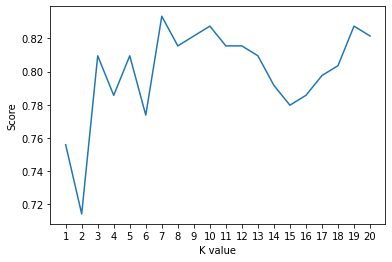

              precision    recall  f1-score   support

           N       0.89      0.73      0.80        77
           Y       0.80      0.92      0.86        91

    accuracy                           0.83       168
   macro avg       0.84      0.83      0.83       168
weighted avg       0.84      0.83      0.83       168



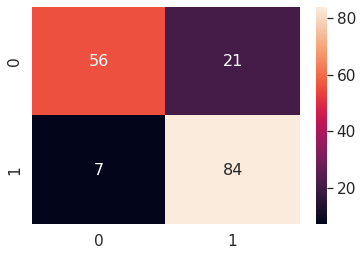

KNN best accuracy: 83.33%


In [ ]:
scoreListknn = []
temp=0
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))
    if KNclassifier.score(x_test, y_test)>temp:
      temp=KNclassifier.score(x_test, y_test)
      k=i
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)

KNN = KNeighborsClassifier(n_neighbors = k)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
print(classification_report(y_test, y_pred))

df_cm=confusion_matrix(y_test, y_pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## Decision Tree

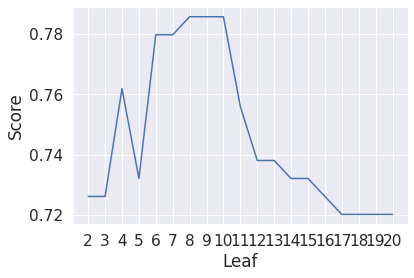

              precision    recall  f1-score   support

           N       0.83      0.68      0.74        77
           Y       0.76      0.88      0.82        91

    accuracy                           0.79       168
   macro avg       0.79      0.78      0.78       168
weighted avg       0.79      0.79      0.78       168



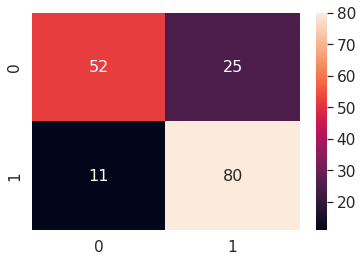

Decision Tree Accuracy: 78.57%


In [ ]:
scoreListDT = []
temp=0
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    if DTclassifier.score(x_test, y_test)>temp:
      temp=DTclassifier.score(x_test, y_test)
      leaf=i
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)

DT = DecisionTreeClassifier(max_leaf_nodes=leaf)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(classification_report(y_test, y_pred))

df_cm=confusion_matrix(y_test, y_pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## SVM

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           N       0.87      0.68      0.76        77
           Y       0.77      0.91      0.83        91

    accuracy                           0.80       168
   macro avg       0.82      0.79      0.80       168
weighted avg       0.81      0.80      0.80       168



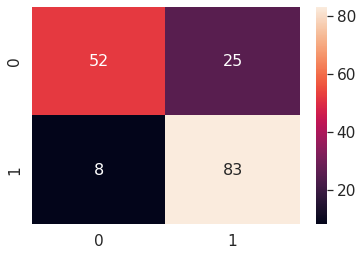

SVC accuracy: 80.36%


In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

df_cm=confusion_matrix(y_test, y_pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


#from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

## Logistic Regression

              precision    recall  f1-score   support

           N       0.88      0.73      0.79        77
           Y       0.80      0.91      0.85        91

    accuracy                           0.83       168
   macro avg       0.84      0.82      0.82       168
weighted avg       0.83      0.83      0.83       168



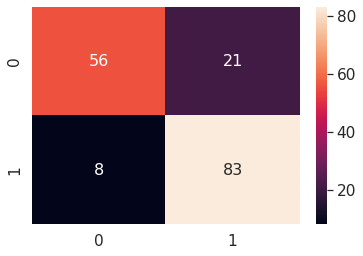

LR accuracy: 82.74%


In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))


df_cm=confusion_matrix(y_test, y_pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()



#from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

# Models Comparison 

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors','SVM','Decision Tree'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, DTAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,83.333333
0,Logistic Regression,82.738095
2,SVM,80.357143
3,Decision Tree,78.571429


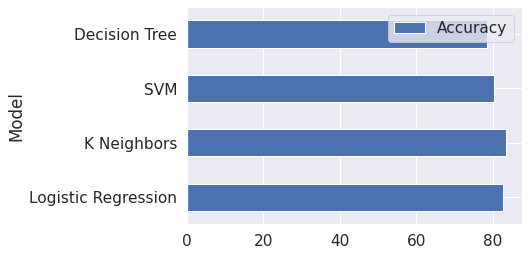

In [ ]:
compare.plot.barh(x="Model",y="Accuracy")